# Toxikind: Models

In [1]:
# OS I/O
import os
import pickle

# Data handling
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

# Modeling
from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV
from sklearn.metrics import f1_score, precision_recall_curve, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Training Data

## Full Data

**Load features:**

In [47]:
path_x_train = "../data/X_train.csv"
X_train = pd.read_csv(path_x_train).set_index("ID")
X_train

,AW,AWeight,Arto,BertzCT,Chi0,Chi1,Chi10,Chi2,Chi3,Chi3c,...,W3D,W3DH,WNSA1,WNSA2,WNSA3,WPSA1,WPSA2,WPSA3,grav,rygr
ID,,,,,,,,,,,,,,,,,,,,,
NCGC00178831-03,5.436720e-01,0.012041,0.815898,0.832518,0.244068,0.251849,0.122744,0.255645,0.247884,0.131926,...,0.028705,0.025992,0.084419,0.992430,0.967627,0.086494,0.022640,0.042745,0.000218,0.231025
NCGC00166114-03,1.268818e-01,0.076781,0.774278,0.816115,0.222113,0.217725,0.158927,0.222859,0.235265,0.126033,...,0.023329,0.009094,0.142494,0.991487,0.972305,0.070178,0.012238,0.059568,0.000336,0.258584
NCGC00263563-01,3.076931e-02,0.012270,0.807649,0.836259,0.495232,0.475479,0.312274,0.508771,0.503347,0.393865,...,0.147491,0.215437,0.174151,0.963958,0.913740,0.259019,0.156472,0.097238,0.000542,0.320086
NCGC00013058-02,7.168569e-01,0.010464,0.760780,0.886043,0.539479,0.508602,0.148179,0.491618,0.425273,0.263047,...,0.147532,0.142056,0.165596,0.976968,0.949863,0.227592,0.092400,0.090178,0.000596,0.291745
NCGC00167516-01,7.989701e-02,0.011206,0.796400,0.941583,0.742331,0.736470,0.295701,0.712026,0.641167,0.352710,...,0.461955,0.460399,0.622595,0.825232,0.702753,0.536326,0.439447,0.260218,0.000796,0.500554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCGC00261292-01,1.428572e-01,0.020621,0.749906,0.669640,0.097777,0.100133,0.012882,0.092409,0.088271,0.038183,...,0.003261,0.004034,0.055917,0.998427,0.988861,0.030003,0.002463,0.013849,0.000069,0.157600
NCGC00261245-01,1.193182e-01,0.016474,0.772778,0.753669,0.223264,0.244135,0.098540,0.214848,0.208197,0.054503,...,0.027008,0.034580,0.069424,0.995076,0.981965,0.096647,0.020009,0.035527,0.000232,0.228288
NCGC00260828-01,9.818000e-08,0.007195,0.766779,0.813525,0.351043,0.324683,0.066131,0.333114,0.291330,0.238414,...,0.097991,0.123973,0.195661,0.978034,0.915763,0.260806,0.085466,0.103675,0.000227,0.514170


**Load targets:**

In [48]:
path_y_train = "../data/y_train.csv"
y_train = pd.read_csv(path_y_train).set_index("ID")
y_train

,NR.AhR,NR.AR,NR.AR.LBD,NR.Aromatase,NR.ER,NR.ER.LBD,NR.PPAR.gamma,SR.ARE,SR.ATAD5,SR.HSE,SR.MMP,SR.p53
ID,,,,,,,,,,,,
NCGC00178831-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
NCGC00166114-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
NCGC00263563-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
NCGC00013058-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
NCGC00167516-01,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
NCGC00261292-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCGC00261245-01,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
NCGC00260828-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Without NAs For Each Target

### 1. NR.AhR

In [49]:
# Create single target without NAs
y_train_ahr = y_train[["NR.AhR"]].dropna()

# Inner merge with features:
train_ahr = y_train_ahr.merge(X_train, how="inner", on="ID")

# Inspect
print(train_ahr.info())

# Split again
X_train_ahr = train_ahr.drop(columns=["NR.AhR"])
y_train_ahr = train_ahr["NR.AhR"]

<class 'pandas.core.frame.DataFrame'>
Index: 8441 entries, NCGC00255644-01 to NCGC00261465-01
Columns: 802 entries, NR.AhR to rygr
dtypes: float64(802)
memory usage: 51.7+ MB
None


### 2. NR.AR

In [50]:
# Create single target without NAs
y_train_ar = y_train[["NR.AR"]].dropna()

# Inner merge with features:
train_ar = y_train_ar.merge(X_train, how="inner", on="ID")

# Inspect
print(train_ar.info())

# Split again
X_train_ar = train_ar.drop(columns=["NR.AR"])
y_train_ar = train_ar["NR.AR"]

<class 'pandas.core.frame.DataFrame'>
Index: 9654 entries, NCGC00167516-01 to NCGC00261465-01
Columns: 802 entries, NR.AR to rygr
dtypes: float64(802)
memory usage: 59.1+ MB
None


### 3. NR.AR.LBD

In [51]:
# Create single target without NAs
y_train_lbd = y_train[["NR.AR.LBD"]].dropna()

# Inner merge with features:
train_lbd = y_train_lbd.merge(X_train, how="inner", on="ID")

# Inspect
print(train_lbd.info())

# Split again
X_train_lbd = train_lbd.drop(columns=["NR.AR.LBD"])
y_train_lbd = train_lbd["NR.AR.LBD"]

<class 'pandas.core.frame.DataFrame'>
Index: 8852 entries, NCGC00094891-01 to NCGC00261465-01
Columns: 802 entries, NR.AR.LBD to rygr
dtypes: float64(802)
memory usage: 54.2+ MB
None


### 4. NR.Aromatase

In [52]:
# Create single target without NAs
y_train_aromatase = y_train[["NR.Aromatase"]].dropna()

# Inner merge with features:
train_aromatase = y_train_aromatase.merge(X_train, how="inner", on="ID")

# Inspect
print(train_aromatase.info())

# Split again
X_train_aromatase = train_aromatase.drop(columns=["NR.Aromatase"])
y_train_aromatase = train_aromatase["NR.Aromatase"]

<class 'pandas.core.frame.DataFrame'>
Index: 7440 entries, NCGC00258497-01 to NCGC00261465-01
Columns: 802 entries, NR.Aromatase to rygr
dtypes: float64(802)
memory usage: 45.6+ MB
None


### 5. NR.ER

In [53]:
# Create single target without NAs
y_train_er = y_train[["NR.ER"]].dropna()

# Inner merge with features:
train_er = y_train_er.merge(X_train, how="inner", on="ID")

# Inspect
print(train_er.info())

# Split again
X_train_er = train_er.drop(columns=["NR.ER"])
y_train_er = train_er["NR.ER"]

<class 'pandas.core.frame.DataFrame'>
Index: 7962 entries, NCGC00161831-02 to NCGC00260687-01
Columns: 802 entries, NR.ER to rygr
dtypes: float64(802)
memory usage: 48.8+ MB
None


### 6. NR.ER.LBD

In [54]:
# Create single target without NAs
y_train_er_lbd = y_train[["NR.ER.LBD"]].dropna()

# Inner merge with features:
train_er_lbd = y_train_er_lbd.merge(X_train, how="inner", on="ID")

# Inspect
print(train_er_lbd.info())

# Split again
X_train_er_lbd = train_er_lbd.drop(columns=["NR.ER.LBD"])
y_train_er_lbd = train_er_lbd["NR.ER.LBD"]

<class 'pandas.core.frame.DataFrame'>
Index: 9040 entries, NCGC00095843-01 to NCGC00261465-01
Columns: 802 entries, NR.ER.LBD to rygr
dtypes: float64(802)
memory usage: 55.4+ MB
None


### 7. NR.PPAR.gamma

In [55]:
# Create single target without NAs
y_train_ppar_gamma = y_train[["NR.PPAR.gamma"]].dropna()

# Inner merge with features:
train_ppar_gamma = y_train_ppar_gamma.merge(X_train, how="inner", on="ID")

# Inspect
print(train_ppar_gamma.info())

# Split again
X_train_ppar_gamma = train_ppar_gamma.drop(columns=["NR.PPAR.gamma"])
y_train_ppar_gamma = train_ppar_gamma["NR.PPAR.gamma"]

<class 'pandas.core.frame.DataFrame'>
Index: 8451 entries, NCGC00091441-01 to NCGC00261465-01
Columns: 802 entries, NR.PPAR.gamma to rygr
dtypes: float64(802)
memory usage: 51.8+ MB
None


### 8. SR.ARE

In [56]:
# Create single target without NAs
y_train_are = y_train[["SR.ARE"]].dropna()

# Inner merge with features:
train_are = y_train_are.merge(X_train, how="inner", on="ID")

# Inspect
print(train_are.info())

# Split again
X_train_are = train_are.drop(columns=["SR.ARE"])
y_train_are = train_are["SR.ARE"]

<class 'pandas.core.frame.DataFrame'>
Index: 7401 entries, NCGC00095016-05 to NCGC00261465-01
Columns: 802 entries, SR.ARE to rygr
dtypes: float64(802)
memory usage: 45.3+ MB
None


### 9. SR.ATAD5

In [57]:
# Create single target without NAs
y_train_atad5 = y_train[["SR.ATAD5"]].dropna()

# Inner merge with features:
train_atad5 = y_train_atad5.merge(X_train, how="inner", on="ID")

# Inspect
print(train_atad5.info())

# Split again
X_train_atad5 = train_atad5.drop(columns=["SR.ATAD5"])
y_train_atad5 = train_atad5["SR.ATAD5"]

<class 'pandas.core.frame.DataFrame'>
Index: 9363 entries, NCGC00094121-01 to NCGC00261465-01
Columns: 802 entries, SR.ATAD5 to rygr
dtypes: float64(802)
memory usage: 57.4+ MB
None


### 10. SR.HSE

In [58]:
# Create single target without NAs
y_train_hse = y_train[["SR.HSE"]].dropna()

# Inner merge with features:
train_hse = y_train_hse.merge(X_train, how="inner", on="ID")

# Inspect
print(train_hse.info())

# Split again
X_train_hse = train_hse.drop(columns=["SR.HSE"])
y_train_hse = train_hse["SR.HSE"]

<class 'pandas.core.frame.DataFrame'>
Index: 8417 entries, NCGC00178831-03 to NCGC00261465-01
Columns: 802 entries, SR.HSE to rygr
dtypes: float64(802)
memory usage: 51.6+ MB
None


### 11. SR.MMP

In [59]:
# Create single target without NAs
y_train_mmp = y_train[["SR.MMP"]].dropna()

# Inner merge with features:
train_mmp = y_train_mmp.merge(X_train, how="inner", on="ID")

# Inspect
print(train_mmp.info())

# Split again
X_train_mmp = train_mmp.drop(columns=["SR.MMP"])
y_train_mmp = train_mmp["SR.MMP"]

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, NCGC00165865-01 to NCGC00261465-01
Columns: 802 entries, SR.MMP to rygr
dtypes: float64(802)
memory usage: 46.3+ MB
None


### 12. SR.p53

In [60]:
# Create single target without NAs
y_train_p53 = y_train[["SR.p53"]].dropna()

# Inner merge with features:
train_p53 = y_train_p53.merge(X_train, how="inner", on="ID")

# Inspect
print(train_p53.info())

# Split again
X_train_p53 = train_p53.drop(columns=["SR.p53"])
y_train_p53 = train_p53["SR.p53"]

<class 'pandas.core.frame.DataFrame'>
Index: 8903 entries, NCGC00166288-01 to NCGC00261465-01
Columns: 802 entries, SR.p53 to rygr
dtypes: float64(802)
memory usage: 54.5+ MB
None


# Test Data

## Full Data

**Load features:**

In [61]:
path_x_test = "../data/X_test.csv"
X_test = pd.read_csv(path_x_test).set_index("ID")
X_test

,AW,AWeight,Arto,BertzCT,Chi0,Chi1,Chi10,Chi2,Chi3,Chi3c,...,W3D,W3DH,WNSA1,WNSA2,WNSA3,WPSA1,WPSA2,WPSA3,grav,rygr
ID,,,,,,,,,,,,,,,,,,,,,
NCGC00261900-01,2.612482e-01,0.009436,0.834646,0.841727,0.394202,0.403771,0.300542,0.408977,0.398087,0.229952,...,0.103505,0.119139,0.142278,0.979173,0.932708,0.230205,0.098362,0.094579,0.000364,0.347710
NCGC00260869-01,8.333336e-02,0.043783,0.812523,0.754532,0.172691,0.172555,0.097883,0.187859,0.182665,0.135654,...,0.013413,0.007371,0.076107,0.996066,0.972912,0.065423,0.009872,0.055111,0.000187,0.232328
NCGC00261776-01,3.074000e-08,0.007837,0.886389,0.789065,0.155035,0.171825,0.176321,0.168661,0.186405,0.067600,...,0.011447,0.008864,0.068405,0.997175,0.982732,0.052118,0.006282,0.023628,0.000112,0.227702
NCGC00261380-01,8.000004e-02,0.017566,0.779903,0.732086,0.177179,0.186014,0.063751,0.171348,0.161561,0.063016,...,0.015035,0.012926,0.093085,0.995702,0.977549,0.059355,0.007999,0.025659,0.000143,0.227832
NCGC00261842-01,3.838000e-08,0.022434,0.782527,0.742158,0.178172,0.173317,0.033886,0.169590,0.151955,0.105279,...,0.012993,0.012214,0.098637,0.993249,0.955067,0.057505,0.011489,0.023847,0.000140,0.226269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCGC00357168-01,1.000000e-08,0.038929,0.599925,0.246331,0.043519,0.038314,0.000000,0.022882,0.013918,0.000000,...,0.000256,0.000578,0.018569,0.999713,0.993413,0.013657,0.000617,0.005536,0.000013,0.111147
NCGC00357283-01,2.714000e-08,0.013148,0.749906,0.527482,0.117176,0.115798,0.005907,0.095839,0.080535,0.030828,...,0.004334,0.007400,0.037757,0.998458,0.979364,0.045173,0.005385,0.017875,0.000070,0.183334
NCGC00357210-01,9.050000e-09,0.033198,0.749906,0.573813,0.055716,0.052455,0.000000,0.048756,0.045081,0.023726,...,0.000517,0.000408,0.025334,0.999671,0.994989,0.011548,0.000437,0.005116,0.000028,0.105349


**Load targets:**

In [62]:
path_y_test = "../data/y_test.csv"
y_test = pd.read_csv(path_y_test).set_index("ID")
y_test

,NR.AhR,NR.AR,NR.AR.LBD,NR.Aromatase,NR.ER,NR.ER.LBD,NR.PPAR.gamma,SR.ARE,SR.ATAD5,SR.HSE,SR.MMP,SR.p53
ID,,,,,,,,,,,,
NCGC00261900-01,0.0,1.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0
NCGC00260869-01,0.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCGC00261776-01,1.0,1.0,0.0,NaN,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
NCGC00261380-01,NaN,0.0,NaN,1.0,0.0,NaN,NaN,1.0,0.0,NaN,0.0,NaN
NCGC00261842-01,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
NCGC00357168-01,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
NCGC00357283-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCGC00357210-01,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0


## Data Without NAs For Each Target

### 1. NR.AhR

In [63]:
# Create single target without NAs
y_test_ahr = y_test[["NR.AhR"]].dropna()

# Inner merge with features:
test_ahr = y_test_ahr.merge(X_test, how="inner", on="ID")

# Inspect
print(test_ahr.info())

# Split again
X_test_ahr = test_ahr.drop(columns=["NR.AhR"])
y_test_ahr = test_ahr["NR.AhR"]

<class 'pandas.core.frame.DataFrame'>
Index: 610 entries, NCGC00261900-01 to NCGC00357144-01
Columns: 802 entries, NR.AhR to rygr
dtypes: float64(802)
memory usage: 3.7+ MB
None


### 2. NR.AR

In [64]:
# Create single target without NAs
y_test_ar = y_test[["NR.AR"]].dropna()

# Inner merge with features:
test_ar = y_test_ar.merge(X_test, how="inner", on="ID")

# Inspect
print(test_ar.info())

# Split again
X_test_ar = test_ar.drop(columns=["NR.AR"])
y_test_ar = test_ar["NR.AR"]

<class 'pandas.core.frame.DataFrame'>
Index: 586 entries, NCGC00261900-01 to NCGC00357144-01
Columns: 802 entries, NR.AR to rygr
dtypes: float64(802)
memory usage: 3.6+ MB
None


### 3. NR.AR.LBD

In [65]:
# Create single target without NAs
y_test_lbd = y_test[["NR.AR.LBD"]].dropna()

# Inner merge with features:
test_lbd = y_test_lbd.merge(X_test, how="inner", on="ID")

# Inspect
print(test_lbd.info())

# Split again
X_test_lbd = test_lbd.drop(columns=["NR.AR.LBD"])
y_test_lbd = test_lbd["NR.AR.LBD"]

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, NCGC00261776-01 to NCGC00357144-01
Columns: 802 entries, NR.AR.LBD to rygr
dtypes: float64(802)
memory usage: 3.6+ MB
None


### 4. NR.Aromatase

In [66]:
# Create single target without NAs
y_test_aromatase = y_test[["NR.Aromatase"]].dropna()

# Inner merge with features:
test_aromatase = y_test_aromatase.merge(X_test, how="inner", on="ID")

# Inspect
print(test_aromatase.info())

# Split again
X_test_aromatase = test_aromatase.drop(columns=["NR.Aromatase"])
y_test_aromatase = test_aromatase["NR.Aromatase"]

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, NCGC00261900-01 to NCGC00357144-01
Columns: 802 entries, NR.Aromatase to rygr
dtypes: float64(802)
memory usage: 3.2+ MB
None


### 5. NR.ER

In [67]:
# Create single target without NAs
y_test_er = y_test[["NR.ER"]].dropna()

# Inner merge with features:
test_er = y_test_er.merge(X_test, how="inner", on="ID")

# Inspect
print(test_er.info())

# Split again
X_test_er = test_er.drop(columns=["NR.ER"])
y_test_er = test_er["NR.ER"]

<class 'pandas.core.frame.DataFrame'>
Index: 516 entries, NCGC00261900-01 to NCGC00357144-01
Columns: 802 entries, NR.ER to rygr
dtypes: float64(802)
memory usage: 3.2+ MB
None


### 6. NR.ER.LBD

In [68]:
# Create single target without NAs
y_test_er_lbd = y_test[["NR.ER.LBD"]].dropna()

# Inner merge with features:
test_er_lbd = y_test_er_lbd.merge(X_test, how="inner", on="ID")

# Inspect
print(test_er_lbd.info())

# Split again
X_test_er_lbd = test_er_lbd.drop(columns=["NR.ER.LBD"])
y_test_er_lbd = test_er_lbd["NR.ER.LBD"]

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, NCGC00261900-01 to NCGC00357118-01
Columns: 802 entries, NR.ER.LBD to rygr
dtypes: float64(802)
memory usage: 3.7+ MB
None


### 7. NR.PPAR.gamma

In [69]:
# Create single target without NAs
y_test_ppar_gamma = y_test[["NR.PPAR.gamma"]].dropna()

# Inner merge with features:
test_ppar_gamma = y_test_ppar_gamma.merge(X_test, how="inner", on="ID")

# Inspect
print(test_ppar_gamma.info())

# Split again
X_test_ppar_gamma = test_ppar_gamma.drop(columns=["NR.PPAR.gamma"])
y_test_ppar_gamma = test_ppar_gamma["NR.PPAR.gamma"]

<class 'pandas.core.frame.DataFrame'>
Index: 605 entries, NCGC00261900-01 to NCGC00357144-01
Columns: 802 entries, NR.PPAR.gamma to rygr
dtypes: float64(802)
memory usage: 3.7+ MB
None


### 8. SR.ARE

In [70]:
# Create single target without NAs
y_test_are = y_test[["SR.ARE"]].dropna()

# Inner merge with features:
test_are = y_test_are.merge(X_test, how="inner", on="ID")

# Inspect
print(test_are.info())

# Split again
X_test_are = test_are.drop(columns=["SR.ARE"])
y_test_are = test_are["SR.ARE"]

<class 'pandas.core.frame.DataFrame'>
Index: 555 entries, NCGC00260869-01 to NCGC00357144-01
Columns: 802 entries, SR.ARE to rygr
dtypes: float64(802)
memory usage: 3.4+ MB
None


### 9. SR.ATAD5

In [71]:
# Create single target without NAs
y_test_atad5 = y_test[["SR.ATAD5"]].dropna()

# Inner merge with features:
test_atad5 = y_test_atad5.merge(X_test, how="inner", on="ID")

# Inspect
print(test_atad5.info())

# Split again
X_test_atad5 = test_atad5.drop(columns=["SR.ATAD5"])
y_test_atad5 = test_atad5["SR.ATAD5"]

<class 'pandas.core.frame.DataFrame'>
Index: 622 entries, NCGC00261900-01 to NCGC00357118-01
Columns: 802 entries, SR.ATAD5 to rygr
dtypes: float64(802)
memory usage: 3.8+ MB
None


### 10. SR.HSE

In [72]:
# Create single target without NAs
y_test_hse = y_test[["SR.HSE"]].dropna()

# Inner merge with features:
test_hse = y_test_hse.merge(X_test, how="inner", on="ID")

# Inspect
print(test_hse.info())

# Split again
X_test_hse = test_hse.drop(columns=["SR.HSE"])
y_test_hse = test_hse["SR.HSE"]

<class 'pandas.core.frame.DataFrame'>
Index: 610 entries, NCGC00261900-01 to NCGC00357144-01
Columns: 802 entries, SR.HSE to rygr
dtypes: float64(802)
memory usage: 3.7+ MB
None


### 11. SR.MMP

In [73]:
# Create single target without NAs
y_test_mmp = y_test[["SR.MMP"]].dropna()

# Inner merge with features:
test_mmp = y_test_mmp.merge(X_test, how="inner", on="ID")

# Inspect
print(test_mmp.info())

# Split again
X_test_mmp = test_mmp.drop(columns=["SR.MMP"])
y_test_mmp = test_mmp["SR.MMP"]

<class 'pandas.core.frame.DataFrame'>
Index: 543 entries, NCGC00260869-01 to NCGC00357144-01
Columns: 802 entries, SR.MMP to rygr
dtypes: float64(802)
memory usage: 3.3+ MB
None


### 12. SR.p53

In [74]:
# Create single target without NAs
y_test_p53 = y_test[["SR.p53"]].dropna()

# Inner merge with features:
test_p53 = y_test_p53.merge(X_test, how="inner", on="ID")

# Inspect
print(test_p53.info())

# Split again
X_test_p53 = test_p53.drop(columns=["SR.p53"])
y_test_p53 = test_p53["SR.p53"]

<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, NCGC00261900-01 to NCGC00357144-01
Columns: 802 entries, SR.p53 to rygr
dtypes: float64(802)
memory usage: 3.8+ MB
None


# Gradient Boost with Unscaled data

In [5]:
mmp_train = X_mmp.merge(y_mmp, how="inner", on="Unnamed: 0")

## split again

In [6]:
X_mmp_train = mmp_train.drop(columns=["SR.MMP"]).to_numpy()
y_mmp_train = mmp_train["SR.MMP"].to_numpy()

In [8]:
model = GradientBoostingClassifier(
    n_estimators=300, 
    learning_rate=0.1,
    max_depth=4
)

In [9]:
# # Cross-validation
# cross_validation = cross_validate(model
#                                     , X=X_mmp_train, y=y_mmp_train, cv=5,
#                                 scoring=["accuracy",
#                                          "recall",
#                                          "precision",
#                                          "f1"
#                                         ]
#                                )

In [10]:
# model.fit(X_mmp_train, y_mmp_train)





GradientBoostingClassifier(max_depth=4, n_estimators=300)

In [ ]:
# with open('GradientBoosting.pkl', 'wb') as f:
#     pickle.dump(model, f)

In [ ]:
# mmp_train['proba_non_toxic'], mmp_train['proba_toxic'] = cross_val_predict(
#     estimator=model,
#     X=X_mmp_train,
#     y=y_mmp_train,
#     cv=5,
#     method='predict_proba'
# ).T

# precision, recall, threshold = precision_recall_curve(
#     mmp_train["SR.MMP"], 
#     mmp_train['proba_toxic']
# )

# print(f'precision- {precision}')
# print(f'recall- {recall}')
# print(f'threshold- {threshold}')

# scores = pd.DataFrame({
#     'threshold': threshold,
#     'precision': precision[:-1],
#     'recall': recall[:-1]
# })


In [ ]:
# # Step 1: Get precision, recall, and thresholds from predicted probabilities
# precision, recall, thresholds = precision_recall_curve(
#     mmp_train["SR.MMP"], 
#     mmp_train["proba_toxic"]
# )

# # Step 2: Compute F1 score for each threshold
# f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# # Step 3: Find the best threshold that maximizes F1
# best_idx = np.argmax(f1_scores)
# best_threshold = thresholds[best_idx]
# max_f1 = f1_scores[best_idx]

# print(f"Best Threshold for Max F1: {best_threshold:.4f}")
# print(f"Max F1 Score: {max_f1:.4f}")

# # Step 4: Apply the best threshold to make binary predictions
# mmp_train["predicted_class"] = (mmp_train["proba_toxic"] >= best_threshold).astype(int)

# # Step 5: Evaluate the final classification performance
# print("\nClassification Report:")
# print(classification_report(
#     mmp_train["SR.MMP"], 
#     mmp_train["predicted_class"]
# ))

# # Step 6: Optional — Plot F1 vs Threshold
# plt.plot(thresholds, f1_scores[:-1])
# plt.xlabel("Threshold")
# plt.ylabel("F1 Score")
# plt.title("F1 Score vs. Threshold")
# plt.grid(True)
# plt.show()

## Neural networks

In [ ]:
scaler = StandardScaler()
X_mmp_train_scaled = scaler.fit_transform(X_mmp_train)

In [ ]:
print(X_mmp_train_scaled)

In [30]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Input(shape=(X_mmp_train_scaled.shape[1],)),  
    Dense(64, activation='relu', kernel_regularizer=l2(0.0005)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.0005)),
    Dense(1, activation='sigmoid')
])


# #0.0005 or 0.0001



model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall','precision'])



early_stop = EarlyStopping(patience=5, restore_best_weights=True)

NameError: name 'X_mmp_train_scaled' is not defined

In [ ]:
history = model.fit(X_mmp_train_scaled, y_mmp_train, validation_split=0.2,
          epochs=50, batch_size=32, callbacks=[early_stop])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# model_2 = Sequential([
#     Dense(64, input_dim=X_mmp_train_scaled.shape[1], activation='relu'),
#     Dropout(0.3),
#     Dense(32, activation='relu'),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')  
# ])

In [ ]:
# model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall','precision'])

In [ ]:
# history_2 = model_2.fit(X_mmp_train_scaled, y_mmp_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

In [ ]:
# y_probs = model_2.predict(X_val).flatten()
# thresholds = np.arange(0.1, 0.9, 0.01)
# f1_scores = [f1_score(y_val, y_probs > t) for t in thresholds]

# best_threshold = thresholds[np.argmax(f1_scores)]
# best_f1 = max(f1_scores)

# print(f"Best F1: {best_f1:.4f} at threshold {best_threshold:.2f}")

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Train/Test split (do this BEFORE applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_mmp_train_scaled, y_mmp_train, stratify=y_mmp_train, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE to the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
pd.Series(y_train_resampled).value_counts()

In [ ]:
neural_network = Sequential([
    Input(shape=(X_train_resampled.shape[1],)),  
    Dense(64, activation='relu', kernel_regularizer=l2(0.0005)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.0005)),
    Dense(1, activation='sigmoid')
])


In [ ]:
neural_network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall','precision'])



early_stop = EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
history = neural_network .fit(X_train_resampled, y_train_resampled,
          epochs=50, batch_size=32)

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Loading Test Data

In [22]:
path_features_test = "../code/elcinelif/toxikind/raw_data/tox21_dense_test.csv.gz"
X_mmp_test = pd.read_csv(path_features_test).set_index("Unnamed: 0")
path_targets_test = "../code/elcinelif/toxikind/raw_data/tox21_labels_test.csv.gz"
y_test = pd.read_csv(path_targets_test).set_index("Unnamed: 0")
y_mmp_test = y_test[["SR.MMP"]].dropna()

In [23]:
mmp_test = X_mmp_test.merge(y_mmp_test, how="inner", on="Unnamed: 0")

### Splitting test data again 

In [24]:
X_mmp_test = mmp_test.drop(columns=["SR.MMP"]).to_numpy()
y_mmp_test = mmp_test["SR.MMP"].to_numpy()

In [25]:
importances = model.feature_importances_
top_indices = np.argsort(importances)[::-1][:80]
X_new = X_mmp_train[:, top_indices]

In [26]:
X_new


array([[ 7.533e+00,  0.000e+00,  1.908e+00, ..., -3.900e-02,  8.810e-01,
         8.000e-02],
       [ 5.007e+00,  0.000e+00,  1.705e+00, ..., -3.500e-02,  1.310e-01,
         1.790e-01],
       [ 3.188e+00,  0.000e+00,  1.713e+00, ...,  4.000e-03,  1.770e-01,
         4.000e-02],
       ...,
       [ 8.905e+00,  0.000e+00,  1.897e+00, ...,  1.000e-01,  4.550e-01,
        -5.600e-02],
       [ 1.340e+00,  5.750e+00,  1.700e+00, ...,  1.290e-01,  1.953e+00,
        -1.000e-03],
       [-8.956e+00,  5.750e+00,  1.827e+00, ...,  1.140e-01,  2.240e-01,
         3.900e-02]])

In [27]:
model_reduced = GradientBoostingClassifier()

In [28]:
mmp_train['proba_non_toxic'], mmp_train['proba_toxic'] = cross_val_predict(
    estimator=model,
    X=X_new,
    y=y_mmp_train,
    cv=5,
    method='predict_proba'
).T

precision, recall, threshold = precision_recall_curve(
    mmp_train["SR.MMP"], 
    mmp_train['proba_toxic']
)

print(f'precision- {precision}')
print(f'recall- {recall}')
print(f'threshold- {threshold}')

scores = pd.DataFrame({
    'threshold': threshold,
    'precision': precision[:-1],
    'recall': recall[:-1]
})

precision- [0.15612596 0.15614662 0.15616728 ... 1.         1.         1.        ]
recall- [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.69491525e-03
 8.47457627e-04 0.00000000e+00]
threshold- [6.23810938e-04 8.19792191e-04 9.16737739e-04 ... 9.95970012e-01
 9.96826574e-01 9.97058964e-01]


Best Threshold for Max F1: 0.2326
Max F1 Score: 0.6833

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      6378
         1.0       0.64      0.73      0.68      1180

    accuracy                           0.89      7558
   macro avg       0.79      0.83      0.81      7558
weighted avg       0.90      0.89      0.90      7558



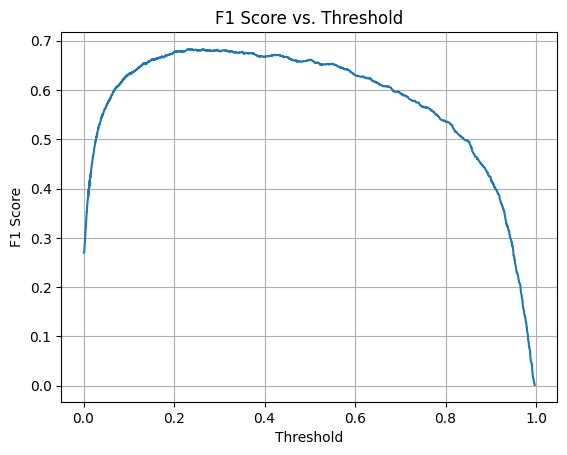

In [29]:
# Step 1: Get precision, recall, and thresholds from predicted probabilities
precision, recall, thresholds = precision_recall_curve(
    mmp_train["SR.MMP"], 
    mmp_train["proba_toxic"]
)

# Step 2: Compute F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# Step 3: Find the best threshold that maximizes F1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
max_f1 = f1_scores[best_idx]

print(f"Best Threshold for Max F1: {best_threshold:.4f}")
print(f"Max F1 Score: {max_f1:.4f}")

# Step 4: Apply the best threshold to make binary predictions
mmp_train["predicted_class"] = (mmp_train["proba_toxic"] >= best_threshold).astype(int)

# Step 5: Evaluate the final classification performance
print("\nClassification Report:")
print(classification_report(
    mmp_train["SR.MMP"], 
    mmp_train["predicted_class"]
))

# Step 6: Optional — Plot F1 vs Threshold
plt.plot(thresholds, f1_scores[:-1])
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Threshold")
plt.grid(True)
plt.show()